# Como aprenden las redes neuronales
### Autograd y Metodos de Optimizacion (A partir de una red convolucional)
---
Para dar inicio se realizaran las llamadas de librerias, etc


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #capas sin parametros

---
# 1) Autograd y Metodos de Optimización
---

In [2]:
x = torch.Tensor(2)                     # tensor de dimension 1
x.requires_grad=True                    # x.requires_grad   no debe estar habilutado, True para habilitarlo.
loss= 13*x[0] + 7*x[1] +1               # Esta es una función lineal  donde sus derivadas parciales son muy faciles.
loss.backward()                         # Aplicado autograd
print(x)
x.grad                                  # Mostrando el gradiente

tensor([-1.9938e+05,  3.0822e-41], requires_grad=True)


tensor([13.,  7.])

In [3]:
x = torch.rand((2,3), requires_grad=True) # Definiendo otro tensor, además habilito el gradiente.
y = torch.Tensor([[1,2],[3,4]])           #Defino otro tensor
loss = y.mm(x)                            #Multiplicacion matricial de los labels y la pérdida
loss = loss.sum()                         #suma de los elementos de la matriz anterior
loss.backward()                           #calculando el gradiente
x.grad                                    #Mostrando el gradiente.

tensor([[4., 4., 4.],
        [6., 6., 6.]])

In [4]:
"""
train = True

with torch.set_grad_enabled(train):
  #computos con tesonres

"""

'\ntrain = True\n\nwith torch.set_grad_enabled(train):\n  #computos con tesonres\n\n'

### Llamando librerias .py alojadas en colab

In [6]:
from google.colab import drive #importamos google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/dl-pytorch')

In [11]:
import optimizers_viz as optviz

In [12]:
problem = optviz.build_beales_problem()
constructors = optviz.build_optimizers(problem.lr)
params = optviz.build_params(problem)

WARN: your minima is not the true minima 6.2378991814835185 0.06476498015548297


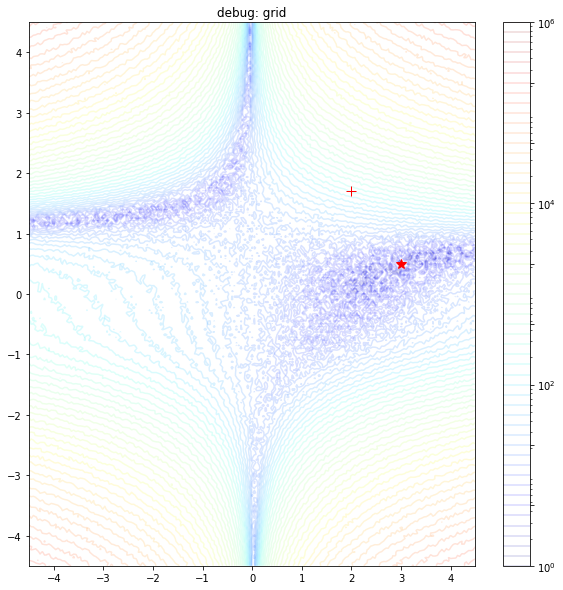

In [13]:
optviz.plot_minimized_function(params)

* Mientras más rojo es la curva de nivel la función es más alta. Mientras que la curva de nivel es más azul, la función es más baja.

* En la gráfica se muestra donde se encuentra (+) y se quiere llegar por medio del gradiente a (*) que es el punto más bajo.

In [14]:
constructors

{'Adadelta': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'Adagrad': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'Adam': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'Adamax': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'RMSprop': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'SGD': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'momentum': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'momentum_dampen': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'nesterov': <function optimizers_viz.build_optimizers.<locals>.<lambda>>,
 'nesterov_decay': <function optimizers_viz.build_optimizers.<locals>.<lambda>>}

In [15]:
zpaths, results, distance, lrs = optviz.run_optimizers(problem, constructors, params)


SGD 171.33552897240992 	 True 	 False
momentum 169.9029926356133 	 True 	 False
momentum_dampen 167.59886271923608 	 True 	 False
nesterov 168.40853740803436 	 True 	 False
nesterov_decay 177.38010589639563 	 True 	 False
Adadelta 176.99508916278452 	 True 	 False
Adagrad 176.56609247683429 	 True 	 False
Adamax 180.74036402326928 	 True 	 False
RMSprop 175.22271692168027 	 True 	 False
Adam 173.65752056567925 	 True 	 False


* En el resultado anterior, se puede observar que todos llegaron a un mínimo relativamente parecido.

* En la gráfica de pérdida se logra observar cuál optimizador llega más rápido al mínimo de la función de pérdida. (nesterov, RMSProp, Adam...) 

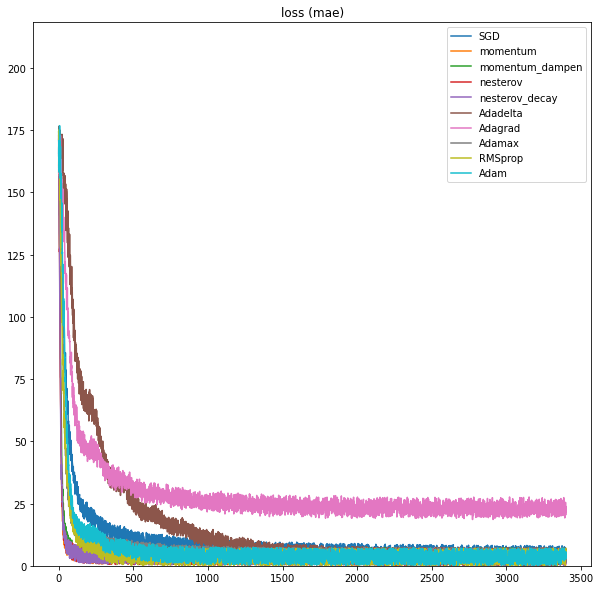

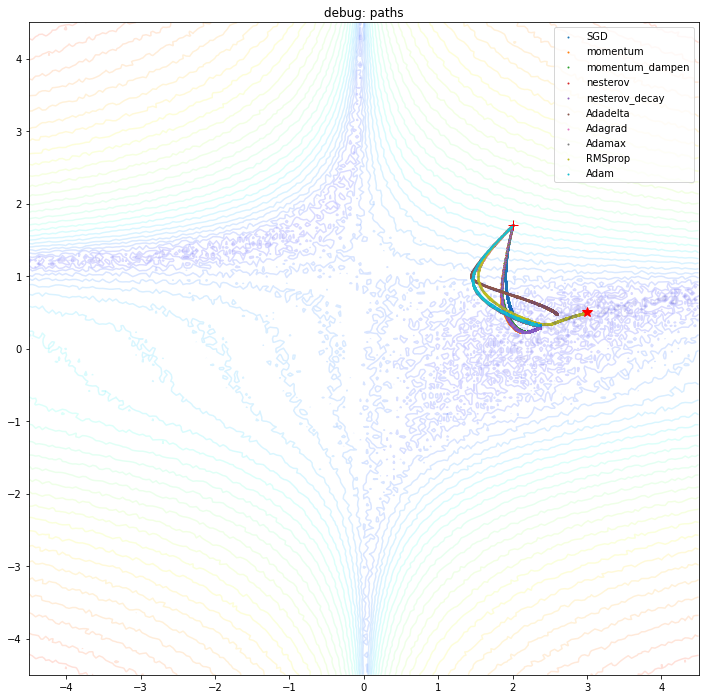

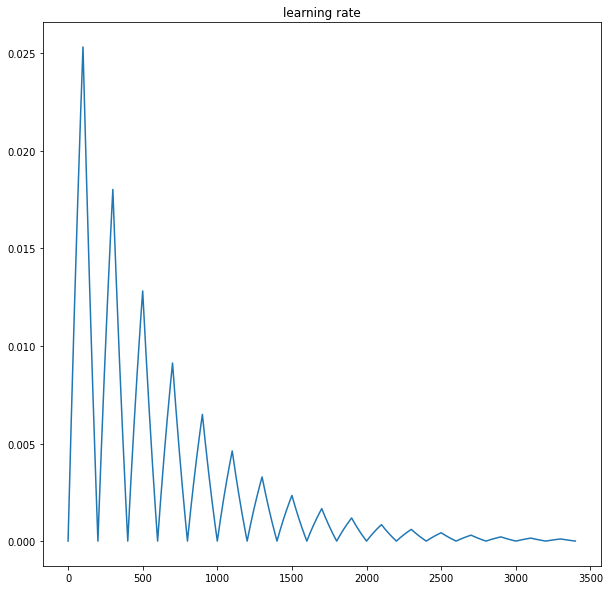

In [29]:
optviz.plot_optim_journeys(zpaths, results, distance, lrs, params)